
<h1 style='text-align: center; font-family: verdana; font-size:32px;color: black'>Movie Industry Revenue Analysis</h1> 



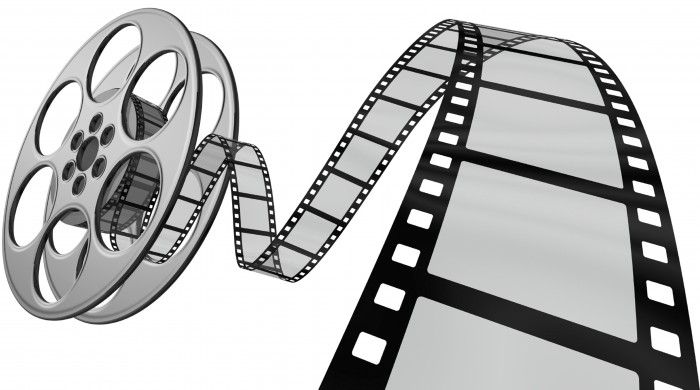

***

## Objective
Is movie industry dying as more other types of entertainment emerging? We are going to mainly use the variable total gross in this dataset to analyze the tendency of movie's revenue and the correlations with other movie features.

## Analysis Steps
   * Import libraries and dataset
   * Prepare & Clean the data
   * Analyse & Visualize data
      1. the highest and lowest gross
      2. gross vs. year
      3. gross vs. country
      4. gross vs. genre
      5. correlation between budget vs. gross
      6. correlatiosn with other movie features
   * Draw Insights 

<h3 style='font-style: italic; color: MidnightBlue'>Import libraries and dataset</h3>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize']=[10,6]
pd.options.mode.chained_assignment = None


In [2]:
# import dataset
df=pd.read_csv(r'C:\Users\16479\OneDrive\Desktop\data\movies.csv')

***

<h3 style='font-style: italic; color: MidnightBlue'>Prepare & Clean the data</h3>





In [3]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [4]:
df.shape

(7668, 15)

In [5]:
# check if the data types are correct; check is there any missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#check missing datas. 'budget' has many missing values. need to consider if we should drop these missing data

#pd.set_option('display.max_rows', None) # or 1000
df[df['budget'].isna()].head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [8]:
#decide drop all missing data; going to measure correaltion between 'budget' and 'gross', so only need valid data 
df=df.dropna()
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
# check duplicate 
df.duplicated().sum()

0

In [10]:
# columns 'votes','budget', 'gross','runtime' are float, change them to integer
df[['votes','budget', 'gross','runtime']]=df[['votes','budget', 'gross','runtime']].astype('int64')

Noticed that the top 3 lowest gross movies are actually 'Titanic', 'Avengers: Endgame', 'Avatar'. All are very famous so it seems not right to have negative gross. Check online to see the right gross number and replace the negative gross.

In [11]:
# replace negative gross to the right gross search online

df.loc[df['name']=='Titanic', 'gross']=658672302
df.loc[df['name']=='Avengers: Endgame', 'gross']=2790000000
df.loc[df['name']=='Avatar', 'gross']=760507625


In [12]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124


***

<h3 style='font-style: italic; color: MidnightBlue'>Analyse & Visualize data</h3>

In [13]:
# calculate the average gross of all movies
df['gross'].mean()

102558704.27079874

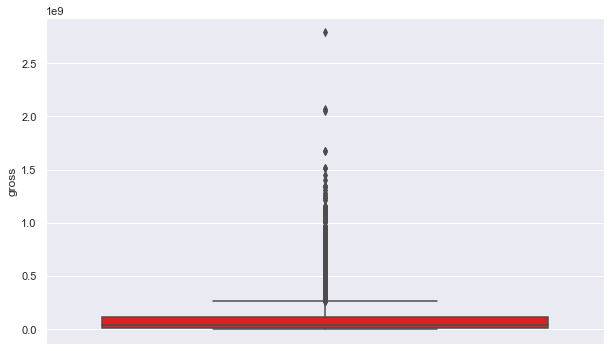

In [14]:
# check all gross data
sns.boxplot(y='gross', data=df, color='red')
plt.show()


<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>1. what are the movies having highest gross and lowest gross?</p>


In [15]:
# find the movies having top 3 highest gross
df_highest=df.sort_values('gross', ascending=False)
df_highest.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2790000000,Marvel Studios,181
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [16]:
# find the bottom lowest gross movies
df_lowest=df.sort_values('gross')
df_lowest.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108



<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>2. Does movies' revenue have any tendency with released years? </p>


In [17]:
df['year'].min()

1980

In [18]:
df['year'].max()

2020

In [19]:
# check how many movies left after cleaning the data for each year
df['year'].value_counts(sort=False)

1980     40
1981     63
1982     71
1983     83
1984     88
1985     95
1986     99
1987    104
1988    130
1989    115
1990    111
1991    113
1992    131
1993    140
1994    128
1995    138
1996    144
1997    149
1998    148
1999    162
2000    162
2001    164
2002    173
2003    159
2004    158
2005    170
2006    163
2007    157
2008    171
2009    171
2010    164
2011    160
2012    162
2013    161
2014    163
2015    156
2016    158
2017    133
2018    143
2019    113
2020      8
Name: year, dtype: int64

In [20]:
# calculate the mean and median gross for each year
year_gross=df.groupby('year')['gross'].agg([min, max, 'mean', 'median'])

#change the unit of gross to million
year_gross=year_gross/1000000  #change unit to million
year_gross.sort_values('mean', ascending=False, inplace=True)
year_gross=year_gross.reset_index()

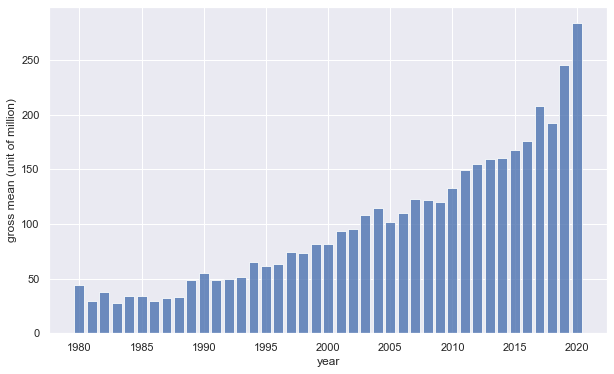

In [21]:
# make a bar plot to visualise the gross change by years

plt.bar(year_gross['year'], year_gross['mean'], alpha=0.8, label="mean")
plt.xlabel('year')
plt.ylabel('gross mean (unit of million)')
plt.show()

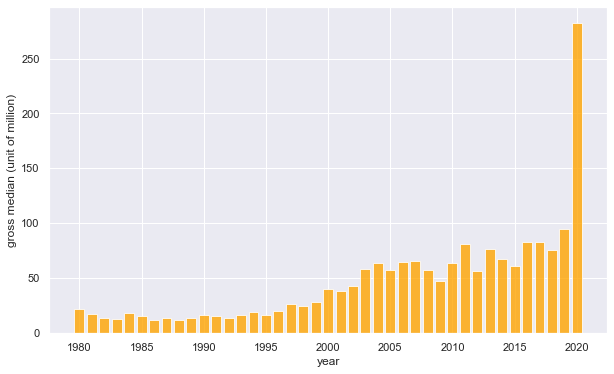

In [22]:
plt.bar(year_gross['year'], year_gross['median'],alpha=0.8, label="median", color='orange')
plt.xlabel('year')
plt.ylabel('gross median (unit of million)')
plt.show()

Observed that there are only 25 input values for year 2020, and after cleaing only 8 data left. Both mean and average of gross for 2020 are out of range compared with other years. So decided to remove all data of 2020.

In [23]:
# remove all data of year 2020
df=df[~(df['year']==2020)]


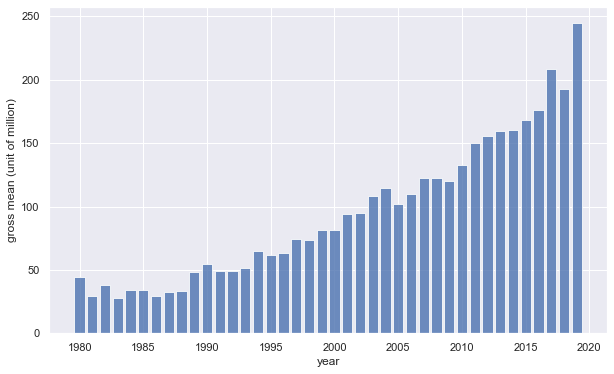

In [24]:
# calculate the mean and median gross again for each year
year_gross=df.groupby('year')['gross'].agg([min, max, 'mean', 'median'])

#change the unit of gross to million
year_gross=year_gross/1000000  #change unit to million
year_gross.sort_values('mean', ascending=False, inplace=True)
year_gross=year_gross.reset_index()

#plot bar chart year vs. mean gross
plt.bar(year_gross['year'], year_gross['mean'], alpha=0.8, label="mean")
plt.xlabel('year')
plt.ylabel('gross mean (unit of million)')
plt.show()

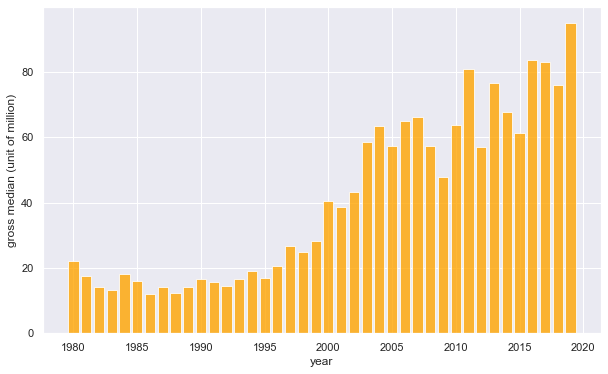

In [25]:
plt.bar(year_gross['year'], year_gross['median'],alpha=0.8, label="median", color='orange')
plt.xlabel('year')
plt.ylabel('gross median (unit of million)')
plt.show()

The gross of movies does gradually increase a lot from 1980 to 2020, around 8 times. While it does not mean the profit increases as well. We are going to check the relationship between budget and gross later.

<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>3. Does the average gross from each country differ a lot?</p>


In [26]:
# explore how many movies are listed per country, are they evenly contributed?
df['country'].value_counts()

United States                     4314
United Kingdom                     492
Canada                             109
France                             105
Germany                             82
Australia                           42
Japan                               28
China                               25
Hong Kong                           24
Ireland                             21
Italy                               19
Spain                               18
New Zealand                         18
South Korea                         13
Mexico                              11
Denmark                             10
India                                8
Czech Republic                       7
Sweden                               5
Switzerland                          4
Belgium                              4
Russia                               4
South Africa                         4
Argentina                            3
Norway                               3
Taiwan                   

In [27]:

# countries with number of movies less than 5 are removed, since the gross of these movies can not represent the countries
df_country_5=df.groupby('country')['country'].agg(count='count')
df_country_5=df_country_5.loc[df_country_5['count']>=5]
df_country_5=df_country_5.sort_values('count', ascending=False).reset_index()
df_country_5

,country,count
0,United States,4314
1,United Kingdom,492
2,Canada,109
3,France,105
4,Germany,82
5,Australia,42
6,Japan,28
7,China,25
8,Hong Kong,24
9,Ireland,21


In [28]:
# calculate the mean and median gross of each country
df_country=df[df['country'].isin(df_country_5['country'])]
df_country=df_country.groupby('country')['gross'].agg(['mean', 'median'])
df_country=df_country/1000000
df_country.sort_values('mean', ascending=False, inplace=True)
df_country=df_country.reset_index()
df_country

,country,mean,median
0,New Zealand,348.797476,40.624266
1,China,233.779896,127.461872
2,United States,107.927744,40.707362
3,United Kingdom,92.178264,26.036237
4,Japan,89.079074,39.360415
5,Germany,69.366871,42.943868
6,Australia,66.673911,22.540737
7,Spain,63.705064,38.465039
8,France,62.557458,29.888235
9,Hong Kong,58.842593,37.077844


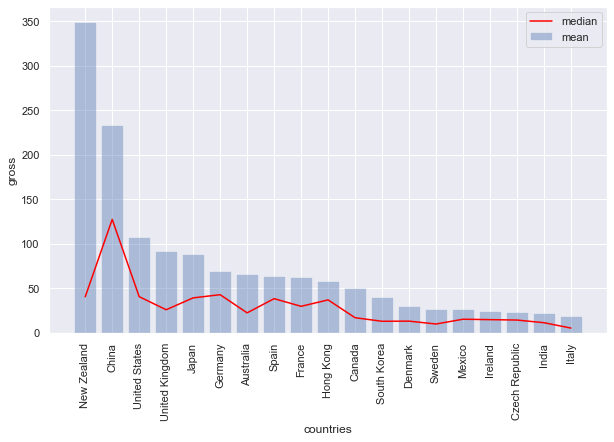

In [29]:
# visualize the result- mean and median gross for each country
plt.bar(df_country['country'], df_country['mean'], label='mean', alpha=0.4)
plt.plot(df_country['country'], df_country['median'], label='median', color='red')
plt.xlabel('countries')
plt.xticks(rotation=90)
plt.ylabel('gross')
plt.legend()
plt.show()

More than 75% of the movies on the list are from U.S. The second contribution country, U.K, only has 1/10 number of movies as U.S. Some other countries only have one movie contribution. So, the comparison of movie gross with different countries can't represent the true fact. The figure above shows New Zealand has the highest average of movie gross, but it is not reliable.


<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>4. let's see if genre of the movies makes gross different?</p>


In [30]:
# see how many movies are listed by each genre
g=df['genre'].value_counts()
g

Comedy       1496
Action       1410
Drama         862
Crime         399
Adventure     325
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

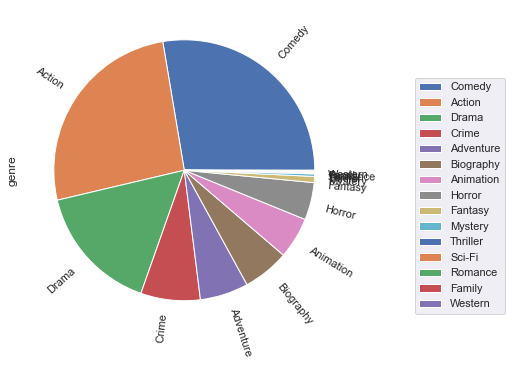

In [31]:
# pie plot - how each of genre is contributed in this dataset
df['genre'].value_counts().plot(kind='pie', labeldistance=1.1, rotatelabels=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.5,0.8))
plt.show()

In [32]:
# mean, median of each genre
df_genre=df.groupby('genre')['gross'].agg(['mean','median'])
df_genre=(df_genre/1000000). sort_values('mean', ascending=False ).reset_index()
df_genre

,genre,mean,median
0,Family,518.583147,403.889034
1,Animation,281.104365,192.306508
2,Action,165.876221,71.007796
3,Adventure,132.991134,43.229904
4,Mystery,117.887733,23.726793
5,Biography,61.395274,33.013805
6,Comedy,59.167659,27.394834
7,Drama,58.483108,21.920819
8,Horror,56.816952,30.553394
9,Crime,50.169579,18.753438


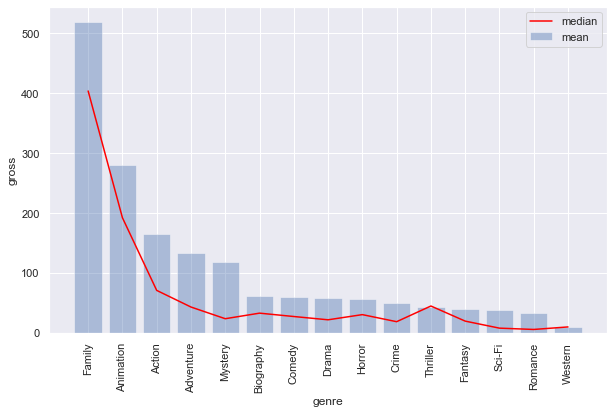

In [33]:
# visualize mean and median info of each genre
plt.bar(df_genre['genre'], df_genre['mean'], label='mean', alpha=0.4)
plt.plot(df_genre['genre'], df_genre['median'], label='median', color='red')
plt.xlabel('genre')
plt.xticks(rotation=90)
plt.ylabel('gross')
plt.legend()
plt.show()

Bar above shows Family genre has the highest average gross, but family genre only has 4 data contributions. Let's take a closer look at those 4 family genre movies. 

In [34]:
df[df['genre']=='Family']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000,792910554,Universal Pictures,115
2433,The Nutcracker,G,Family,1993,"November 24, 1993 (United States)",5.9,1900,Emile Ardolino,Susan Cooper,Darci Kistler,United States,19000000,2119994,Krasnow Productions,92
4569,Raise Your Voice,PG,Family,2004,"October 8, 2004 (United States)",5.9,27000,Sean McNamara,Mitch Rotter,Hilary Duff,United States,15000000,14867514,New Line Cinema,103
7072,Beauty and the Beast,PG,Family,2017,"March 17, 2017 (United States)",7.1,283000,Bill Condon,Stephen Chbosky,Emma Watson,United States,160000000,1264434525,Mandeville Films,129


The family 'Beauty and the Beast' has the highest gross, which helps increase the overall average gross a lot, thus the average gross for family genre might not that reliable since the total number of family movies are fewer compared with other genres. 

Except Family, Animation, Action and Adventure genres have the highest average gross.



<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>5. Correlations between budget and gross</p>

Is it true? Higher budget of the movie gets higher gross in return? Going to check their correlation next

<AxesSubplot:xlabel='budget', ylabel='gross'>

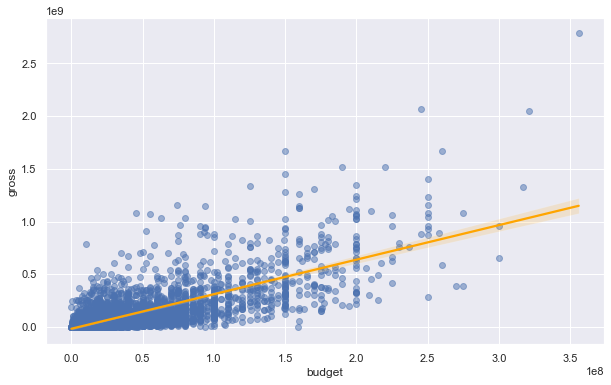

In [35]:
# linear regression
sns.regplot(x='budget', y='gross', data=df, line_kws={'color': 'orange'}, scatter_kws={'alpha':0.5})


In [36]:
# correlation between budget and gross
np.corrcoef(df['budget'], df['gross'])[1,0]

0.7474214456692367

Budget and gross have strong positive correlation, which means higher budget is very likely to receive higher gross as return


<p style='font-family: verdana; font-size:20px;font-style: italic;text-decoration:underline'>6. Draw correlation matrix to see if gross have correlation with other variables</p>

In [37]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055938,0.206223,0.325200,0.280365,0.073717
score,0.055938,1.000000,0.474226,0.071819,0.223918,0.413868
votes,0.206223,0.474226,1.000000,0.440748,0.614669,0.352285
budget,0.325200,0.071819,0.440748,1.000000,0.747421,0.318494
gross,0.280365,0.223918,0.614669,0.747421,1.000000,0.269578
runtime,0.073717,0.413868,0.352285,0.318494,0.269578,1.000000


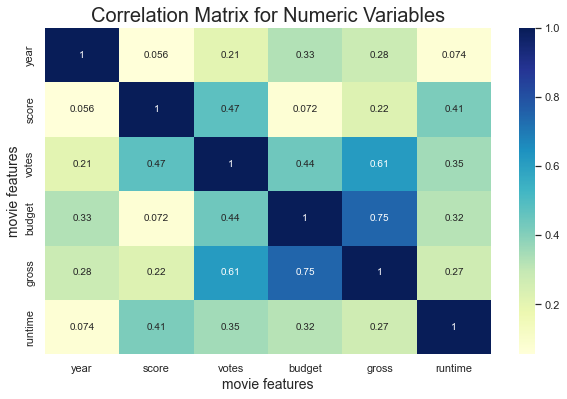

In [38]:

cor_matrix=df.corr()
sns.heatmap(cor_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('movie features', fontsize=14)
plt.ylabel('movie features', fontsize=14)
plt.title('Correlation Matrix for Numeric Variables', fontsize=20)

  
plt.show()

For numeric variables above, gross has relatively strong positive correlation with votes as well. While suprisingly, gross does not have strong correlation with score.

<h3 style='font-style: italic; color: MidnightBlue'>Draw Insights and Conclusions</h3>

- Some variables have missing data, especially the variable budget and gross. Since these are the two main variable we want to analyze, we havet to delete those rows
- Movies' gross increases gradually during last two decades.The average gross remains relatively flat below 20 million dollars between 1980 and 1995, then it is doubled on 2000, around 40 million dollars. It reaches 60 millions around 2005. In 2011, 2016,2017,2019, the average reaches more than 80 million dollars. The data of year 2020 is not included because it is not reliable due to missing data.
- The data is not evenly contributed by different countires, with more than 75% of the movies origniated from U.S. New Zealand has the highest gross average, but only 18 movies are on the list, thus the conclusion between gross and country is not reliable. Further analysis is needed.
- The comparison between gross and genere has similar issue. Since the genre with highest average gross, Family, only have 4 valid data, which is not reliable. 
- Gross has the strongest positive correlation with budget, which makes sense. Higher budget usually can produce higher quality movies, which generate more revenue. 
- Gross also has strong positive correlation with votes, but does not strong correlatons with score or company.